## 语言模型与数据集
在上节中，我们了解了如何将⽂本数据映射为词元，以及将这些词元可以视为⼀系列离散的观测，例如单
词或字符。假设⻓度为T的⽂本序列中的词元依次为x1, x2, . . . , xT。于是，xt（1 ≤ t ≤ T）可以被认为是⽂
本序列在时间步t处的观测或标签。在给定这样的⽂本序列时，语⾔模型（language model）的⽬标是估计序
列的联合概率  
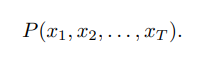

例如，只需要⼀次抽取⼀个词元xt ∼ P(xt | xt−1, . . . , x1)，⼀个理想的语⾔模型就能够基于模型本⾝⽣成⾃
然⽂本。与猴⼦使⽤打字机完全不同的是，从这样的模型中提取的⽂本都将作为⾃然语⾔（例如，英语⽂本）
来传递。只需要基于前⾯的对话⽚断中的⽂本，就⾜以⽣成⼀个有意义的对话。显然，我们离设计出这样的
系统还很遥远，因为它需要“理解”⽂本，⽽不仅仅是⽣成语法合理的内容。

尽管如此，语⾔模型依然是⾮常有⽤的。例如，短语“to recognize speech”和“to wreck a nice beach”读
⾳上听起来⾮常相似。这种相似性会导致语⾳识别中的歧义，但是这很容易通过语⾔模型来解决，因为第⼆
句的语义很奇怪。同样，在⽂档摘要⽣成算法中，“狗咬⼈”⽐“⼈咬狗”出现的频率要⾼得多，或者“我想
吃奶奶”是⼀个相当匪夷所思的语句，⽽“我想吃，奶奶”则要正常得多。


### 学习语言模型
显⽽易⻅，我们⾯对的问题是如何对⼀个⽂档，甚⾄是⼀个词元序列进⾏建模。假设在单词级别对⽂本数据
进⾏词元化，我们可以依靠对之前节中对序列模型的分析。让我们从基本概率规则开始：  
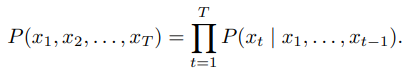  

例如，包含了四个单词的⼀个⽂本序列的概率是：
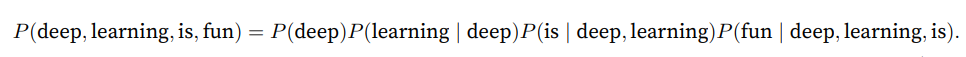  

为了训练语⾔模型，我们需要计算单词的概率，以及给定前⾯⼏个单词后出现某个单词的条件概率。这些概
率本质上就是语⾔模型的参数。  

这⾥，我们假设训练数据集是⼀个⼤型的⽂本语料库。⽐如，维基百科的所有条⽬、古登堡计划101，或者
所有发布在⽹络上的⽂本。训练数据集中词的概率可以根据给定词的相对词频来计算。例如，可以将估计
值Pˆ(deep) 计算为任何以单词“deep”开头的句⼦的概率。⼀种（稍稍不太精确的）⽅法是统计单词“deep”
在数据集中的出现次数，然后将其除以整个语料库中的单词总数。这种⽅法效果不错，特别是对于频繁出现
的单词。接下来，我们可以尝试估计  
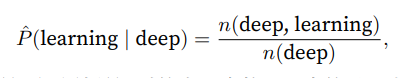  

其中n(x)和n(x, x′)分别是单个单词和连续单词对的出现次数。不幸的是，由于连续单词对“deep learning”
的出现频率要低得多，所以估计这类单词正确的概率要困难得多。特别是对于⼀些不常⻅的单词组合，要想
找到⾜够的出现次数来获得准确的估计可能都不容易。⽽对于三个或者更多的单词组合，情况会变得更糟。
许多合理的三个单词组合可能是存在的，但是在数据集中却找不到。除⾮我们提供某种解决⽅案，来将这些
单词组合指定为⾮零计数，否则将⽆法在语⾔模型中使⽤它们。如果数据集很⼩，或者单词⾮常罕⻅，那么
这类单词出现⼀次的机会可能都找不到。  

⼀种常⻅的策略是执⾏某种形式的拉普拉斯平滑（Laplace smoothing），具体⽅法是在所有计数中添加⼀个
⼩常量。⽤n表⽰训练集中的单词总数，⽤m表⽰唯⼀单词的数量。此解决⽅案有助于处理单元素问题，例如
通过：  

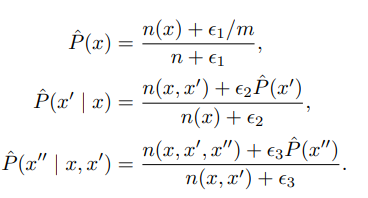

其中，ϵ1, ϵ2和ϵ3是超参数。以ϵ1为例：当ϵ1 = 0时，不应⽤平滑；当ϵ1接近正⽆穷⼤时，Pˆ(x)接近均匀概率分
布1/m。上⾯的公式是 (Wood et al., 2011) 的⼀个相当原始的变形。


然⽽，这样的模型很容易变得⽆效，原因如下：⾸先，我们需要存储所有的计数；其次，这完全忽略了单词
的意思。例如，“猫”（cat）和“猫科动物”（feline）可能出现在相关的上下⽂中，但是想根据上下⽂调整这
类模型其实是相当困难的。最后，⻓单词序列⼤部分是没出现过的，因此⼀个模型如果只是简单地统计先前
“看到”的单词序列频率，那么模型⾯对这种问题肯定是表现不佳的。


### 马尔可夫模型与n元语法
在讨论包含深度学习的解决⽅案之前，我们需要了解更多的概念和术语。回想⼀下我们对⻢尔可
夫模型的讨论，并且将其应⽤于语⾔建模。如果P(xt+1 | xt, . . . , x1) = P(xt+1 | xt)，则序列上的分布满⾜⼀
阶⻢尔可夫性质。阶数越⾼，对应的依赖关系就越⻓。这种性质推导出了许多可以应⽤于序列建模的近似公
式：  
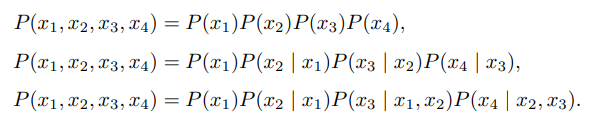  

通常，涉及⼀个、两个和三个变量的概率公式分别被称为 ⼀元语法（unigram）、⼆元语法（bigram）和三
元语法（trigram）模型。下⾯，我们将学习如何去设计更好的模型。


### 自然语言统计
看看在真实数据上如果进⾏⾃然语⾔统计。根据之前介绍的时光机器数据集构建词表，并打印前10个
最常⽤的（频率最⾼的）单词。

In [3]:
import random
import torch
from d2l import torch as d2l

tokens = d2l.tokenize(d2l.read_time_machine())
print("输出tokens：",tokens[0])
# 因为每个⽂本⾏不⼀定是⼀个句⼦或⼀个段落，因此我们把所有⽂本⾏拼接到⼀起
corpus = [token for line in tokens for token in line]
vocab = d2l.Vocab(corpus)
vocab.token_freqs[:10]


输出tokens： ['the', 'time', 'machine', 'by', 'h', 'g', 'wells']


[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

正如我们所看到的，最流⾏的词看起来很⽆聊，这些词通常被称为停⽤词（stop words），因此可以被过滤掉。
尽管如此，它们本⾝仍然是有意义的，我们仍然会在模型中使⽤它们。此外，还有个明显的问题是词频衰减
的速度相当地快。例如，最常⽤单词的词频对⽐，第10个还不到第1个的1/5。为了更好地理解，我们可以画
出的词频图：


freqs: [2261, 1267, 1245, 1155, 816, 695, 552, 541, 443, 440]
token: ['the', 'i', 'and', 'of', 'a', 'to', 'was', 'in', 'that', 'my']


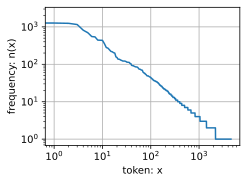

In [8]:
freqs = [freq for token, freq in vocab.token_freqs]
token = [token for token, freq in vocab.token_freqs]
print("freqs:",freqs[0:10])
print("token:",token[0:10])
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',
         xscale='log', yscale='log')


通过此图我们可以发现：词频以⼀种明确的⽅式迅速衰减。将前⼏个单词作为例外消除后，剩余的所有单词
⼤致遵循双对数坐标图上的⼀条直线。这意味着单词的频率满⾜⻬普夫定律（Zipf’s law），即第i个最常⽤
单词的频率ni为：  
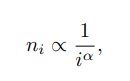  等价于  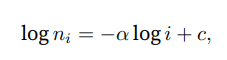



其中α是刻画分布的指数，c是常数。这告诉我们想要通过计数统计和平滑来建模单词是不可⾏的，因为这样
建模的结果会⼤⼤⾼估尾部单词的频率，也就是所谓的不常⽤单词。那么其他的词元组合，⽐如⼆元语法、三
元语法等等，⼜会如何呢？我们来看看⼆元语法的频率是否与⼀元语法的频率表现出相同的⾏为⽅式。


In [9]:
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab = d2l.Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]


[(('of', 'the'), 309),
 (('in', 'the'), 169),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 102),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73)]

这⾥值得注意：在⼗个最频繁的词对中，有九个是由两个停⽤词组成的，只有⼀个与“the time”有关。我
们再进⼀步看看三元语法的频率是否表现出相同的⾏为⽅式。

In [10]:
trigram_tokens = [triple for triple in zip(
    corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab = d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]


[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('here', 'and', 'there'), 15),
 (('it', 'was', 'a'), 15),
 (('i', 'did', 'not'), 14),
 (('seemed', 'to', 'me'), 14),
 (('i', 'began', 'to'), 13),
 (('i', 'saw', 'the'), 13)]

最后，我们直观地对⽐三种模型中的词元频率：⼀元语法、⼆元语法和三元语法。

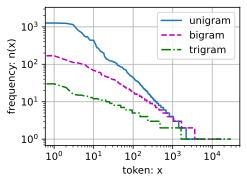

In [11]:
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])


这张图⾮常令⼈振奋！原因有很多：
* 除了⼀元语法词，单词序列似乎也遵循⻬普夫定律，尽管公式中的指数α更⼩（指数的⼤⼩受序
列⻓度的影响）；
* 词表中n元组的数量并没有那么⼤，这说明语⾔中存在相当多的结构，这些结构给了我们应⽤模型的希
望；
* 很多n元组很少出现，这使得拉普拉斯平滑⾮常不适合语⾔建模。作为代替，我们将使⽤基于深度学习
的模型。

### 读取长序列数据
由于序列数据本质上是连续的，因此我们在处理数据时需要解决这个问题。在 8.1节中我们以⼀种相当特别
的⽅式做到了这⼀点：当序列变得太⻓⽽不能被模型⼀次性全部处理时，我们可能希望拆分这样的序列⽅便
模型读取。  

在介绍该模型之前，我们看⼀下总体策略。假设我们将使⽤神经⽹络来训练语⾔模型，模型中的⽹络⼀次处
理具有预定义⻓度（例如n个时间步）的⼀个⼩批量序列。现在的问题是如何随机⽣成⼀个⼩批量数据的特
征和标签以供读取。  

⾸先，由于⽂本序列可以是任意⻓的，例如整本《时光机器》（The Time Machine），于是任意⻓的序列可以
被我们划分为具有相同时间步数的⼦序列。当训练我们的神经⽹络时，这样的⼩批量⼦序列将被输⼊到模型
中。假设⽹络⼀次只处理具有n个时间步的⼦序列。图8.3.1画出了从原始⽂本序列获得⼦序列的所有不同的
⽅式，其中n = 5，并且每个时间步的词元对应于⼀个字符。请注意，因为我们可以选择任意偏移量来指⽰初
始位置，所以我们有相当⼤的⾃由度。  

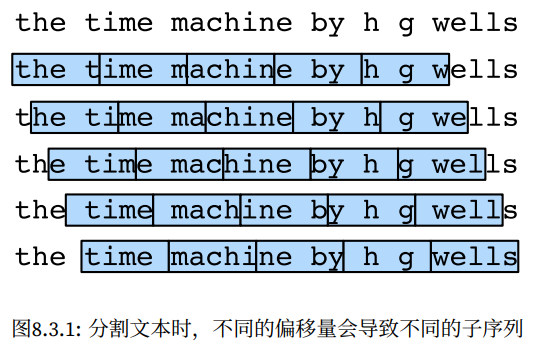

因此，我们应该从 图8.3.1中选择哪⼀个呢？事实上，他们都⼀样的好。然⽽，如果我们只选择⼀个偏移量，
那么⽤于训练⽹络的、所有可能的⼦序列的覆盖范围将是有限的。因此，我们可以从随机偏移量开始划分序
列，以同时获得覆盖性（coverage）和随机性（randomness）。下⾯，我们将描述如何实现随机采样（random
sampling）和 顺序分区（sequential partitioning）策略。


### 随机采样
在随机采样中，每个样本都是在原始的⻓序列上任意捕获的⼦序列。在迭代过程中，来⾃两个相邻的、随机
的、⼩批量中的⼦序列不⼀定在原始序列上相邻。对于语⾔建模，⽬标是基于到⽬前为⽌我们看到的词元来
预测下⼀个词元，因此标签是移位了⼀个词元的原始序列。  

下⾯的代码每次可以从数据中随机⽣成⼀个⼩批量。在这⾥，参数batch_size指定了每个⼩批量中⼦序列样
本的数⽬，参数num_steps是每个⼦序列中预定义的时间步数。

In [12]:
def seq_data_iter_random(corpus, batch_size, num_steps): #@save
    """使⽤随机抽样⽣成⼀个⼩批量⼦序列"""
    # 从随机偏移量开始对序列进⾏分区，随机范围包括num_steps-1
    corpus = corpus[random.randint(0, num_steps - 1):]
    # 减去1，是因为我们需要考虑标签
    num_subseqs = (len(corpus) - 1) // num_steps
    # ⻓度为num_steps的⼦序列的起始索引
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    # 在随机抽样的迭代过程中，
    # 来⾃两个相邻的、随机的、⼩批量中的⼦序列不⼀定在原始序列上相邻
    random.shuffle(initial_indices)


    def data(pos):
        # 返回从pos位置开始的⻓度为num_steps的序列
        return corpus[pos: pos + num_steps]

    num_batches = num_subseqs // batch_size
    for i in range(0, batch_size * num_batches, batch_size):
        # 在这⾥，initial_indices包含⼦序列的随机起始索引
        initial_indices_per_batch = initial_indices[i: i + batch_size]
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y)


下⾯我们⽣成⼀个从0到34的序列。假设批量⼤⼩为2，时间步数为5，这意味着可以⽣成 ⌊(35 − 1)/5⌋ = 6个
“特征－标签”⼦序列对。如果设置⼩批量⼤⼩为2，我们只能得到3个⼩批量。


In [13]:
my_seq = list(range(35))
for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)


X:  tensor([[23, 24, 25, 26, 27],
        [13, 14, 15, 16, 17]]) 
Y: tensor([[24, 25, 26, 27, 28],
        [14, 15, 16, 17, 18]])
X:  tensor([[ 3,  4,  5,  6,  7],
        [28, 29, 30, 31, 32]]) 
Y: tensor([[ 4,  5,  6,  7,  8],
        [29, 30, 31, 32, 33]])
X:  tensor([[18, 19, 20, 21, 22],
        [ 8,  9, 10, 11, 12]]) 
Y: tensor([[19, 20, 21, 22, 23],
        [ 9, 10, 11, 12, 13]])


### 顺序分区
在迭代过程中，除了对原始序列可以随机抽样外，我们还可以保证两个相邻的⼩批量中的⼦序列在原始序列
上也是相邻的。这种策略在基于⼩批量的迭代过程中保留了拆分的⼦序列的顺序，因此称为顺序分区。


In [14]:
def seq_data_iter_sequential(corpus, batch_size, num_steps): #@save
    """使⽤顺序分区⽣成⼀个⼩批量⼦序列"""
    # 从随机偏移量开始划分序列
    offset = random.randint(0, num_steps)
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    Xs = torch.tensor(corpus[offset: offset + num_tokens])
    Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)
    num_batches = Xs.shape[1] // num_steps
    for i in range(0, num_steps * num_batches, num_steps):
        X = Xs[:, i: i + num_steps]
        Y = Ys[:, i: i + num_steps]
        yield X, Y


基于相同的设置，通过顺序分区读取每个⼩批量的⼦序列的特征X和标签Y。通过将它们打印出来可以发现：
迭代期间来⾃两个相邻的⼩批量中的⼦序列在原始序列中确实是相邻的。

In [15]:
for X, Y in seq_data_iter_sequential(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

X:  tensor([[ 2,  3,  4,  5,  6],
        [18, 19, 20, 21, 22]]) 
Y: tensor([[ 3,  4,  5,  6,  7],
        [19, 20, 21, 22, 23]])
X:  tensor([[ 7,  8,  9, 10, 11],
        [23, 24, 25, 26, 27]]) 
Y: tensor([[ 8,  9, 10, 11, 12],
        [24, 25, 26, 27, 28]])
X:  tensor([[12, 13, 14, 15, 16],
        [28, 29, 30, 31, 32]]) 
Y: tensor([[13, 14, 15, 16, 17],
        [29, 30, 31, 32, 33]])


现在，我们将上⾯的两个采样函数包装到⼀个类中，以便稍后可以将其⽤作数据迭代器。

In [ ]:
class SeqDataLoader: #@save
    """加载序列数据的迭代器"""
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            self.data_iter_fn = d2l.seq_data_iter_random
        else:
            self.data_iter_fn = d2l.seq_data_iter_sequential
        self.corpus, self.vocab = d2l.load_corpus_time_machine(max_tokens)
        self.batch_size, self.num_steps = batch_size, num_steps
    
    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

最后，我们定义了⼀个函数load_data_time_machine，它同时返回数据迭代器和词表，因此可以与其他带
有load_data前缀的函数（如之前定义的 d2l.load_data_fashion_mnist）类似地使⽤。

In [16]:
def load_data_time_machine(batch_size, num_steps, #@save
                           use_random_iter=False, max_tokens=10000):
    """返回时光机器数据集的迭代器和词表"""
    data_iter = SeqDataLoader(
        batch_size, num_steps, use_random_iter, max_tokens)
    return data_iter, data_iter.vocab


## 小结
* 语⾔模型是⾃然语⾔处理的关键。
* n元语法通过截断相关性，为处理⻓序列提供了⼀种实⽤的模型。
* ⻓序列存在⼀个问题：它们很少出现或者从不出现。
* ⻬普夫定律⽀配着单词的分布，这个分布不仅适⽤于⼀元语法，还适⽤于其他n元语法。
* 通过拉普拉斯平滑法可以有效地处理结构丰富⽽频率不⾜的低频词词组。
* 读取⻓序列的主要⽅式是随机采样和顺序分区。在迭代过程中，后者可以保证来⾃两个相邻的⼩批量中的⼦序列在原始序列上也是相邻的。